<a href="https://colab.research.google.com/github/bhargav23/EVA4/blob/master/S8/EVA_S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [4]:
import evadataloader
dataloader = evadataloader.DataLoader()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = dataloader.load(testset)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



 frog  bird  frog  deer


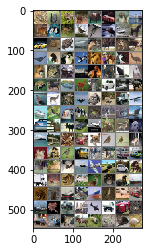

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import evamodel

net = evamodel.ResNet18()

In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import copy

In [0]:
import evascheduler

In [11]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.8356428146362305 Batch_id=390 Accuracy=53.97: 100%|██████████| 391/391 [00:30<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4152, Accuracy: 5848/10000 (58.48%)

EPOCH: 1


Loss=0.657345175743103 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:30<00:00, 14.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2685, Accuracy: 7315/10000 (73.15%)

EPOCH: 2


Loss=0.5421846508979797 Batch_id=390 Accuracy=82.10: 100%|██████████| 391/391 [00:30<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2189, Accuracy: 7811/10000 (78.11%)

EPOCH: 3


Loss=0.1924862414598465 Batch_id=390 Accuracy=87.66: 100%|██████████| 391/391 [00:30<00:00, 14.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2508, Accuracy: 7492/10000 (74.92%)

EPOCH: 4


Loss=0.4942867159843445 Batch_id=390 Accuracy=91.56: 100%|██████████| 391/391 [00:30<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2458, Accuracy: 7542/10000 (75.42%)

EPOCH: 5


Loss=0.2077847719192505 Batch_id=390 Accuracy=94.72: 100%|██████████| 391/391 [00:30<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2274, Accuracy: 7726/10000 (77.26%)

EPOCH: 6


Loss=0.03625788539648056 Batch_id=390 Accuracy=98.90: 100%|██████████| 391/391 [00:30<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1575, Accuracy: 8425/10000 (84.25%)

EPOCH: 7


Loss=0.019833987578749657 Batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [00:30<00:00, 13.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1547, Accuracy: 8453/10000 (84.53%)

EPOCH: 8


Loss=0.010884368792176247 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 13.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1561, Accuracy: 8439/10000 (84.39%)

EPOCH: 9


Loss=0.004107677843421698 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [00:30<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1536, Accuracy: 8464/10000 (84.64%)

EPOCH: 10


Loss=0.007161927409470081 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [00:30<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1538, Accuracy: 8462/10000 (84.62%)

EPOCH: 11


Loss=0.008022802881896496 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1535, Accuracy: 8465/10000 (84.65%)

EPOCH: 12


Loss=0.004555868916213512 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1537, Accuracy: 8463/10000 (84.63%)

EPOCH: 13


Loss=0.005035579204559326 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [00:30<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1537, Accuracy: 8463/10000 (84.63%)

EPOCH: 14


Loss=0.003120285226032138 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1532, Accuracy: 8468/10000 (84.68%)

EPOCH: 15


Loss=0.0034902573097497225 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1530, Accuracy: 8470/10000 (84.70%)

EPOCH: 16


Loss=0.004346227739006281 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1532, Accuracy: 8468/10000 (84.68%)

EPOCH: 17


Loss=0.0063751875422894955 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1531, Accuracy: 8469/10000 (84.69%)

EPOCH: 18


Loss=0.005557000637054443 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1538, Accuracy: 8462/10000 (84.62%)

EPOCH: 19


Loss=0.003206276800483465 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 14.14it/s]



Test set: Average loss: 0.1526, Accuracy: 8474/10000 (84.74%)

